In [421]:
# importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [422]:
#Reading and checking the data from train.csv
housing = pd.read_csv("train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data understanding

In [423]:
housing.shape

(1460, 81)

In [424]:
housing.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [425]:
#checking percentage of missing values in columns, which has null values
nullvalues=housing.isnull().sum()
round((100*(nullvalues[nullvalues > 0])/len(housing.index)), 2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

###### Missing value treatment

In [426]:
#We saw from data_description that NA in PoolQC column means 'No Pool', so replacing NA by it.
housing['PoolQC'].fillna('No_Pool', inplace=True) 

In [427]:
#Alley column--replacing NA with 'No alley access'
housing['Alley'].fillna('No_alley_access', inplace=True) 

In [428]:
#Replacing median values in LotFrontage, where data is missing
housing['LotFrontage']=housing['LotFrontage'].transform(lambda x :x.fillna(x.median()))

In [429]:
housing['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [430]:
#Based on the above output,replacing missing value of MasVnrType with none
housing['MasVnrType'].fillna('None', inplace=True)


In [431]:
#MasVnrArea
housing.MasVnrArea.fillna(housing.MasVnrArea.median(),inplace=True)

In [432]:
#BsmtQual
housing['BsmtQual'].fillna('No_basement', inplace=True)

In [433]:
#BsmtCond
housing['BsmtCond'].fillna('No_basement', inplace=True)

In [434]:
#BsmtExposure
housing['BsmtExposure'].fillna('No_basement', inplace=True)

In [435]:
#BsmtFinType1
housing['BsmtFinType1'].fillna('No_basement', inplace=True)

In [436]:
#BsmtFinType2
housing['BsmtFinType2'].fillna('No_basement', inplace=True)

In [437]:
#Electrical
housing.Electrical.fillna(housing.Electrical.mode(),inplace=True)

In [438]:
#GarageType
housing['GarageType'].fillna('No_Garage', inplace=True)


In [439]:
#GarageFinish
housing['GarageFinish'].fillna('No_Garage', inplace=True)

In [440]:
#GarageQual
housing['GarageQual'].fillna('No_Garage', inplace=True) 


In [441]:
#GarageCond
housing['GarageCond'].fillna('No_Garage', inplace=True) 

#### Feature engineering

In [442]:
housing['Building_age']=housing.YrSold-housing.YearBuilt

In [443]:
housing['Garage_age']=housing.YrSold-housing.GarageYrBlt

In [444]:
housing.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Building_age,Garage_age
319,320,80,RL,69.0,14115,Pave,No_alley_access,Reg,Lvl,AllPub,...,NaN,NaN,0,6,2009,WD,Normal,187500,29,29.0
1405,1406,120,RM,44.0,3842,Pave,No_alley_access,IR1,HLS,AllPub,...,NaN,NaN,0,1,2008,WD,Normal,275000,4,4.0
644,645,20,FV,85.0,9187,Pave,No_alley_access,Reg,Lvl,AllPub,...,NaN,NaN,0,10,2009,New,Partial,370878,0,0.0
579,580,50,RM,81.0,12150,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,NaN,0,11,2008,WD,Normal,131500,54,54.0
414,415,60,RL,59.0,11228,Pave,No_alley_access,IR2,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,228000,15,15.0


#### Dropping unnecessary columns

In [445]:
# Dropping columns which are having high missing value and irrelevant columns for this model
housing=housing.drop(['FireplaceQu','Fence', 'MiscFeature','Id','MoSold','Street','Utilities','Condition2'], axis=1)

In [446]:
round(housing.isnull().sum()/len(housing.index),2).sort_values(ascending=False).head()

Garage_age     0.06
GarageYrBlt    0.06
TotalBsmtSF    0.00
Foundation     0.00
Exterior1st    0.00
dtype: float64

In [447]:
#Replacing Null value of Garage_age with 99,because if I impute '0' then it may misslead as a new garage
housing['Garage_age'].fillna(99, inplace=True) 

In [448]:
housing['Garage_age'] = housing['Garage_age'].astype('int64')

In [449]:
#Dropping GarageYrBlt,YrSold,YearBuilt as we have derived few columns out of these and now these are not required
housing=housing.drop(['GarageYrBlt','YrSold','YearBuilt'],axis=1)

In [450]:
round(housing.isnull().sum()/len(housing.index),2).sort_values(ascending=False).head()

Garage_age      0.0
Building_age    0.0
Exterior2nd     0.0
MasVnrType      0.0
MasVnrArea      0.0
dtype: float64

No Null/missing values now in fields.

In [451]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SaleType,SaleCondition,SalePrice,Building_age,Garage_age
0,60,RL,65.0,8450,No_alley_access,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,No_Pool,0,WD,Normal,208500,5,5
1,20,RL,80.0,9600,No_alley_access,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,No_Pool,0,WD,Normal,181500,31,31
2,60,RL,68.0,11250,No_alley_access,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,No_Pool,0,WD,Normal,223500,7,7
3,70,RL,60.0,9550,No_alley_access,IR1,Lvl,Corner,Gtl,Crawfor,...,0,0,0,No_Pool,0,WD,Abnorml,140000,91,8
4,60,RL,84.0,14260,No_alley_access,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,No_Pool,0,WD,Normal,250000,8,8


### Encoding

In [452]:
#As per the data description few fields are not actually numeric.These are indicating some catagories.
#So replacing with respective values.
#Variable names:MSSubClass,OverallQual,OverallCond

housing['MSSubClass'].replace({20:"1-STORY 1946 & NEWER",
                               30:"1-STORY 1945 & OLDER",
                               40:"1-STORY W/FINISHED",
                               45:"1-1/2 STORY - UNFINISHED",
                               50:"1-1/2 STORY FINISHED",
                               60:"2-STORY 1946 & NEWER",
                               70:"2-STORY 1945 & OLDER",
                               75:"2-1/2 STORY ALL AGES",
                               80:"SPLIT OR MULTI-LEVEL",
                               85:"SPLIT FOYER",
                               90:"DUPLEX",
                               120:"1-STORY PUD",
                               150:"1-1/2 STORY PUD",
                               160:"2-STORY PUD",
                               180:"PUD - MULTILEVEL",
                               190:"2 FAMILY CONVERSION"                         
                              },inplace=True)
housing['OverallQual'].replace({10:"Very Excellent",9:"Excellent",8:"Very Good",7:"Good",
                                 6:"Above Average",5:"Average",4:"Below Average",3:"Fair",2:"Poor",1:"Very Poor"                            
                              },inplace=True)
housing['OverallCond'].replace({10:"Very Excellent",9:"Excellent",8:"Very Good",7:"Good",
                                 6:"Above Average",5:"Average",4:"Below Average",3:"Fair",2:"Poor",1:"Very Poor"                            
                              },inplace=True)

In [453]:
#Encoding of some ordered catagorical variables:ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,PoolQC
ExterQual_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1}
housing['ExterQual'] = housing['ExterQual'].map(ExterQual_map)

ExterCond_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1}
housing['ExterCond'] = housing['ExterCond'].map(ExterCond_map)


BsmtQual_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1,'No_basement':0}
housing['BsmtQual'] = housing['BsmtQual'].map(BsmtQual_map)


BsmtCond_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1,'No_basement':0}
housing['BsmtCond'] = housing['BsmtCond'].map(BsmtCond_map)


HeatingQC_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1}
housing['HeatingQC'] = housing['HeatingQC'].map(HeatingQC_map)

CentralAir_map = {'Y':1,'N':0}
housing['CentralAir'] = housing['CentralAir'].map(CentralAir_map)

KitchenQual_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1}
housing['KitchenQual'] = housing['KitchenQual'].map(KitchenQual_map)

GarageFinish_map = {'Fin':3,'RFn':2,'Unf':1,'No_Garage':0}
housing['GarageFinish'] = housing['GarageFinish'].map(GarageFinish_map)

GarageQual_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1,'No_Garage':0}
housing['GarageQual'] = housing['GarageQual'].map(GarageQual_map)

GarageCond_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1,'No_Garage':0}
housing['GarageCond'] = housing['GarageCond'].map(GarageCond_map)

PoolQC_map = {'Ex':4, 'Gd':3, 'TA':2,'Fa':1,'No_Pool':0}
housing['PoolQC'] = housing['PoolQC'].map(PoolQC_map)

In [454]:
housing.shape

(1460, 72)

###### Checking the value counts of few catagorical variables where number of catagories are more

creating new catagory 'others' and putting catagories which has low count into it.

In [455]:
#Neighborhood
housing.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [456]:
need_field=housing['Neighborhood'].value_counts().index[:9]
housing['Neighborhood'] = np.where(housing['Neighborhood'].isin(need_field), housing['Neighborhood'], 'Nei_others')

In [457]:
housing['Neighborhood'].value_counts()

Nei_others    483
NAmes         225
CollgCr       150
OldTown       113
Edwards       100
Somerst        86
Gilbert        79
NridgHt        77
Sawyer         74
NWAmes         73
Name: Neighborhood, dtype: int64

In [458]:
#Exterior1st
housing.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [459]:

need_field=housing['Exterior1st'].value_counts().index[:7]
housing['Exterior1st'] = np.where(housing['Exterior1st'].isin(need_field), housing['Exterior1st'], 'Exter_others')

housing.Exterior1st.value_counts()

VinylSd         515
HdBoard         222
MetalSd         220
Wd Sdng         206
Plywood         108
Exter_others     78
CemntBd          61
BrkFace          50
Name: Exterior1st, dtype: int64

In [460]:
#Exterior2nd
housing.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [461]:
need_field=housing['Exterior2nd'].value_counts().index[:6]
housing['Exterior2nd'] = np.where(housing['Exterior2nd'].isin(need_field), housing['Exterior2nd'], 'Exter2_others')
housing.Exterior2nd.value_counts()

VinylSd          504
MetalSd          214
HdBoard          207
Wd Sdng          197
Plywood          142
Exter2_others    136
CmentBd           60
Name: Exterior2nd, dtype: int64

#### Outlier treatment

In [462]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1460.0,69.863699,22.027677,21.0,60.00,69.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
ExterQual,1460.0,3.395890,0.574280,2.0,3.00,3.0,4.00,5.0
ExterCond,1460.0,3.083562,0.351054,1.0,3.00,3.0,3.00,5.0
BsmtQual,1460.0,3.489041,0.876478,0.0,3.00,4.0,4.00,5.0
BsmtCond,1460.0,2.934932,0.552159,0.0,3.00,3.0,3.00,4.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


We observed that Outliers are present in data.

In [463]:
#Removing outliers from numeric columns
#here I am taking 25% and 99%
num_col = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice','Building_age','Garage_age']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.05)
        Q3 = x[col].quantile(.95)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

housing = drop_outliers(housing)

In [464]:
housing.shape

(1349, 72)

## Visualising the Data

#### Visualising Numeric Variables

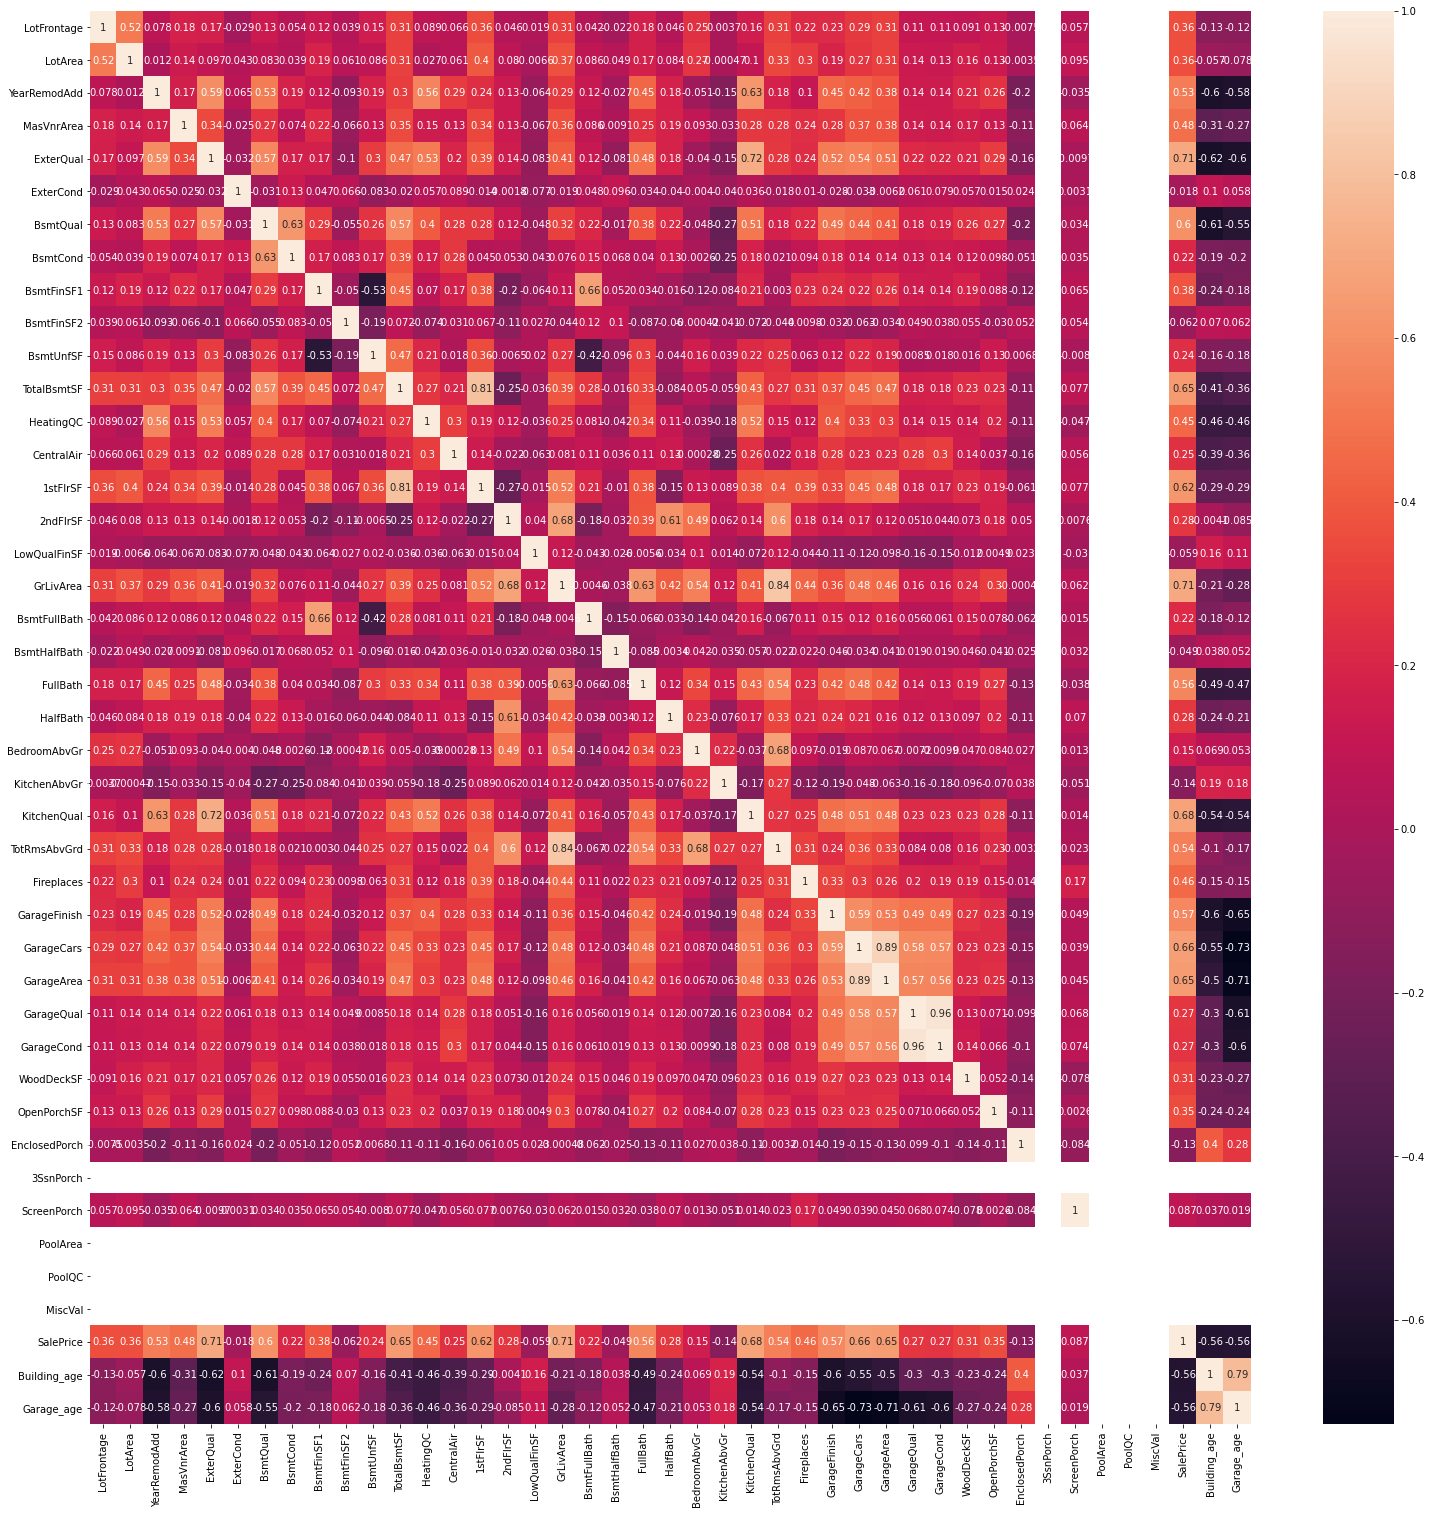

In [465]:
#Heatmap to see corelation
plt.figure(figsize=(26,26))
sns.heatmap(housing[list(housing.dtypes[housing.dtypes!='object'].index)].corr(),annot=True)
plt.show()

In [466]:
housing.dtypes[housing.dtypes=='object'].index

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical',
       'Functional', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

### Dummy Variables creation

In [467]:
#Creating dummy variables for catagorical variables

dummy_col = pd.get_dummies(housing[['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical',
       'Functional', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition']],
                           drop_first=True)

In [468]:
#concat the new dummy variables and housing DF
housing = pd.concat([housing,dummy_col],axis= 1)

In [469]:
#dropping original catagorical variables for which we have created dummies
housing.drop(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical',
       'Functional', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition'], axis = 1, inplace = True)

In [470]:
housing.shape

(1349, 202)

###### Checking the distribution of target variable-SalePrice

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

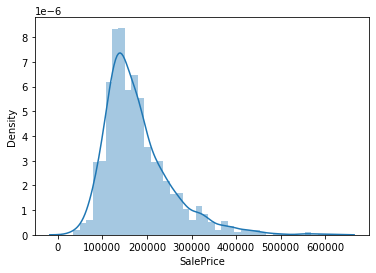

In [471]:
sns.distplot(housing['SalePrice'])

Observation:The distribution of target variable is right skewed.

###### Train test split

In [472]:
# Splitting the data into train and test
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

##### Scaling

In [473]:
#applying scaler
num_col = ['Building_age','Garage_age','ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC',
           'CentralAir','KitchenQual','GarageFinish','GarageQual','GarageCond','PoolQC','GarageCars','GarageArea','WoodDeckSF',
           'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd','MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
           'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','LotFrontage','LotArea','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [474]:
#creating y_train and x_train
y_train = df_train.pop('SalePrice')
X_train = df_train

In [475]:
X_train.shape

(944, 201)

In [476]:
#creating y_test and x_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [477]:
X_test.shape

(405, 201)

## Linear Regression

In [478]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [479]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9391516399046358
-1792603288085.2197
57.440851930023754
686822942049825.2
0.060848360095364144
1695859116172.408


## Ridge Regression

###### Parameter tuning

In [480]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    5.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [481]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021012,0.002137,0.009290,0.001360,0.0001,{'alpha': 0.0001},-0.214009,-0.244884,-0.204182,-0.227297,...,-0.222951,0.013669,23,-0.167643,-0.153277,-0.170186,-0.161234,-0.162859,-0.163040,0.005846
1,0.020083,0.002255,0.007562,0.002114,0.001,{'alpha': 0.001},-0.213977,-0.244818,-0.204144,-0.227154,...,-0.222886,0.013653,22,-0.167651,-0.153284,-0.170197,-0.161237,-0.162866,-0.163047,0.005847
2,0.021997,0.000705,0.009296,0.000828,0.01,{'alpha': 0.01},-0.213670,-0.244208,-0.203853,-0.225812,...,-0.222285,0.013487,21,-0.167727,-0.153349,-0.170296,-0.161269,-0.162935,-0.163115,0.005859
3,0.021094,0.001509,0.009741,0.000416,0.05,{'alpha': 0.05},-0.212486,-0.242214,-0.203708,-0.221515,...,-0.220458,0.012823,17,-0.168025,-0.153694,-0.170733,-0.161470,-0.163227,-0.163430,0.005884
4,0.020922,0.001670,0.009778,0.000381,0.1,{'alpha': 0.1},-0.211383,-0.240739,-0.203993,-0.218546,...,-0.219112,0.012325,15,-0.168359,-0.154107,-0.171129,-0.161653,-0.163540,-0.163758,0.005884
5,0.022410,0.002185,0.009473,0.000931,0.2,{'alpha': 0.2},-0.209836,-0.238779,-0.204688,-0.214334,...,-0.217297,0.011724,12,-0.168900,-0.154784,-0.171787,-0.162012,-0.164091,-0.164315,0.005883
6,0.021712,0.000686,0.010415,0.000899,0.3,{'alpha': 0.3},-0.208956,-0.237656,-0.205594,-0.211721,...,-0.216383,0.011388,10,-0.169383,-0.155392,-0.172297,-0.162599,-0.164675,-0.164869,0.005840
7,0.020103,0.001875,0.008658,0.000749,0.4,{'alpha': 0.4},-0.208364,-0.236735,-0.206363,-0.210247,...,-0.215779,0.011094,8,-0.169977,-0.155966,-0.172726,-0.163262,-0.165261,-0.165439,0.005800
8,0.021383,0.001062,0.009262,0.001240,0.5,{'alpha': 0.5},-0.208044,-0.235951,-0.207013,-0.209139,...,-0.215325,0.010837,7,-0.170542,-0.156481,-0.173106,-0.163929,-0.165852,-0.165982,0.005763
9,0.022308,0.003661,0.009058,0.000685,0.6,{'alpha': 0.6},-0.207850,-0.235398,-0.207586,-0.208281,...,-0.215000,0.010659,5,-0.171084,-0.156964,-0.173477,-0.164560,-0.166421,-0.166501,0.005734


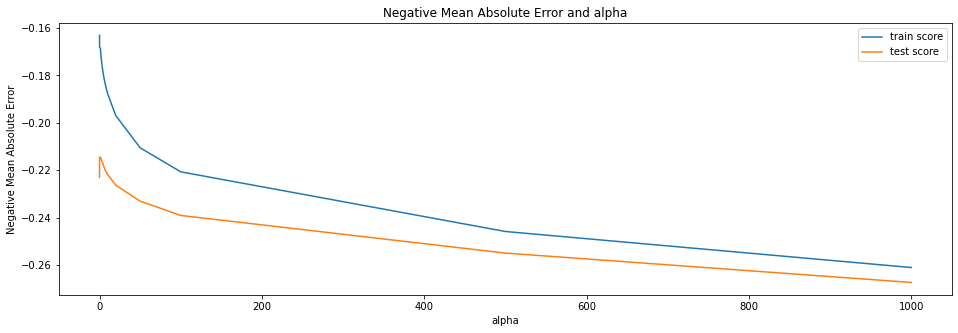

In [482]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [483]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1.0}


In [484]:
#Fitting Ridge model for alpha =1.0  and printing coefficients which have been penalised
alpha =1.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.14959020e-02  2.63057770e-02  1.32409723e-02  4.95081615e-02
  3.14333955e-02 -2.43889111e-02  1.39498162e-02  8.74941093e-03
  9.17430927e-02 -1.23531053e-02 -2.17531368e-04  9.30147542e-02
  1.80654754e-02  1.00730550e-02  1.29622865e-01  1.26135134e-01
 -1.04433618e-02  2.07939738e-01  1.18931477e-02 -4.91874554e-03
  3.11869841e-02  3.70242413e-02 -5.79044004e-02 -6.51211621e-02
  1.35105270e-02  5.63242134e-02  6.79342176e-03 -4.04286412e-03
  4.63376711e-02  3.18445499e-02  5.06971813e-02 -1.93955217e-02
  1.74558394e-02  1.82443683e-02  2.04625508e-02  0.00000000e+00
  3.20568522e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.38221689e-01  2.00521212e-02 -4.27270900e-02  4.05923436e-02
  2.43502019e-02 -5.73084129e-02  6.21089275e-02 -2.57653576e-02
  1.68396597e-02  7.24634313e-02  1.12790663e-01 -3.73692926e-02
 -5.75271415e-02 -1.02050452e-01 -5.31223379e-02  2.43959211e-02
  2.80205795e-01  2.56833723e-01  2.62845351e-01  1.80069849e-01
  5.48421452e-03  4.18991

In [485]:
# Lets calculate some metrics such as R2 score, RSS and MSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)

0.9372002732714337
0.9099093247105997
59.282942031766524
34.51758850647902
0.06279972672856624
0.08522861359624449


## Lasso Regression

In [486]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    7.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [487]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [488]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.211380,0.044210,0.008679,0.000735,0.0001,{'alpha': 0.0001},-0.208010,-0.234752,-0.205971,-0.215404,...,-0.216306,0.010177,2,-0.168972,-0.156008,-0.172616,-0.162702,-0.164299,-0.164919,0.005663
1,0.116550,0.007373,0.010159,0.001157,0.001,{'alpha': 0.001},-0.198537,-0.222922,-0.209708,-0.209652,...,-0.210052,0.007732,1,-0.182401,-0.171586,-0.182236,-0.176745,-0.178942,-0.178382,0.004005
2,0.032582,0.001625,0.009369,0.001261,0.01,{'alpha': 0.01},-0.223694,-0.262110,-0.246000,-0.236286,...,-0.239624,0.013441,3,-0.230366,-0.224920,-0.221854,-0.222505,-0.224538,-0.224837,0.003000
3,0.024646,0.001104,0.009821,0.000994,0.05,{'alpha': 0.05},-0.247421,-0.297343,-0.283959,-0.285883,...,-0.275276,0.018072,4,-0.274077,-0.263281,-0.268278,-0.266943,-0.270372,-0.268590,0.003586
4,0.023887,0.001734,0.009338,0.001054,0.1,{'alpha': 0.1},-0.262619,-0.312676,-0.298219,-0.304733,...,-0.291922,0.017915,5,-0.288393,-0.283174,-0.284659,-0.282826,-0.286537,-0.285118,0.002097
5,0.023960,0.001271,0.009355,0.000704,0.2,{'alpha': 0.2},-0.309332,-0.358115,-0.341561,-0.356654,...,-0.340211,0.017717,6,-0.334108,-0.337463,-0.330546,-0.329240,-0.333972,-0.333066,0.002906
6,0.023769,0.001549,0.009769,0.001327,0.3,{'alpha': 0.3},-0.371641,-0.423856,-0.402230,-0.431538,...,-0.406433,0.020854,7,-0.398019,-0.410212,-0.392872,-0.396438,-0.400201,-0.399548,0.005843
7,0.022202,0.002426,0.009367,0.000797,0.4,{'alpha': 0.4},-0.448225,-0.505758,-0.468918,-0.523116,...,-0.484364,0.026748,8,-0.470792,-0.491591,-0.469290,-0.478037,-0.475787,-0.477099,0.007917
8,0.023057,0.001467,0.009360,0.000478,0.5,{'alpha': 0.5},-0.534477,-0.594705,-0.545794,-0.611175,...,-0.568196,0.029555,9,-0.553095,-0.579335,-0.554822,-0.560676,-0.560165,-0.561618,0.009335
9,0.021295,0.001991,0.009538,0.002105,0.6,{'alpha': 0.6},-0.607910,-0.682934,-0.623173,-0.703574,...,-0.650554,0.036508,10,-0.630036,-0.667883,-0.641424,-0.645148,-0.642702,-0.645439,0.012367


In [489]:
#Fitting lasso model for alpha =0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [490]:
# Lets calculate some metrics such as R2 score, RSS and MSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9303101975410959
0.9125551366817101
65.78717352120546
33.503864848720525
0.06968980245890409
0.08272559221906302


In [491]:
lasso.coef_

array([ 2.08507363e-02,  2.37508874e-02,  2.01325529e-02,  5.25454400e-02,
        3.86003241e-02, -1.87843502e-02, -0.00000000e+00,  0.00000000e+00,
        8.94447130e-02, -9.58703523e-03,  0.00000000e+00,  7.78640476e-02,
        1.92085264e-02,  7.76459405e-03,  4.23991592e-02,  0.00000000e+00,
       -3.28079963e-02,  3.27097677e-01,  1.04232297e-02, -1.80664072e-03,
        2.70735165e-02,  2.99435585e-02, -5.70659314e-02, -7.65003035e-02,
        1.82144636e-02,  5.15067608e-02,  1.78713030e-02, -1.09468921e-04,
        4.91373817e-02,  3.03809073e-02,  6.24314813e-03, -0.00000000e+00,
        1.40469412e-02,  1.68973905e-02,  1.82709726e-02,  0.00000000e+00,
        2.87333671e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.27220366e-01,  1.75203027e-02, -5.78723222e-03,  0.00000000e+00,
        8.41475417e-03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  1.16531152e-02,  4.45918079e-02, -2.38372446e-02,
       -0.00000000e+00, -

In [492]:
# Creating a table which contains all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric1, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.391516e-01,0.937200,0.930310
1,R2 Score (Test),-1.792603e+12,0.909909,0.912555
2,RSS (Train),5.744085e+01,59.282942,65.787174
3,RSS (Test),6.868229e+14,34.517589,33.503865
4,MSE (Train),2.466746e-01,0.250599,0.263988
5,MSE (Test),1.302252e+06,0.291939,0.287621


#### Lets observe the changes in the coefficients after regularization

In [493]:
betas = pd.DataFrame(index=X_train.columns)

In [494]:
betas.rows = X_train.columns

In [495]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [496]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
LotFrontage,1.831417e-02,0.021496,0.020851
LotArea,3.565967e-02,0.026306,0.023751
YearRemodAdd,1.591124e-02,0.013241,0.020133
MasVnrArea,4.038712e-02,0.049508,0.052545
ExterQual,2.074542e-02,0.031433,0.038600
ExterCond,-2.501091e-02,-0.024389,-0.018784
BsmtQual,3.959592e-03,0.013950,-0.000000
BsmtCond,3.336610e-03,0.008749,0.000000
BsmtFinSF1,-1.414292e+11,0.091743,0.089445
BsmtFinSF2,-4.467016e+10,-0.012353,-0.009587


In [497]:
#seeing all data
betas

,Linear,Ridge,Lasso
LotFrontage,1.831417e-02,0.021496,0.020851
LotArea,3.565967e-02,0.026306,0.023751
YearRemodAdd,1.591124e-02,0.013241,0.020133
MasVnrArea,4.038712e-02,0.049508,0.052545
ExterQual,2.074542e-02,0.031433,0.038600
ExterCond,-2.501091e-02,-0.024389,-0.018784
BsmtQual,3.959592e-03,0.013950,-0.000000
BsmtCond,3.336610e-03,0.008749,0.000000
BsmtFinSF1,-1.414292e+11,0.091743,0.089445
BsmtFinSF2,-4.467016e+10,-0.012353,-0.009587


Observation from lasso and Ridge models:
    By checking the R2_score we came to know that Lasso has better performace on test and train both as compared to Ridge.
    So we should conside Lasso model.

#### Analysis for subjective question1:

###### Lasso -double the value of alpha

In [498]:
#double the value of alpha for lasso
alpha =0.001*2

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [499]:
# Lets calculate some metrics such as R2 score, RSS and MSE for double the value of alpha

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9249991386976475
0.9095035170470928
70.80081306942068
34.67307076806394
0.07500086130235242
0.08561252041497268


###### Ridge-double the value of alpha

In [500]:
#ridge
alpha =1.0*2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=2.0)

In [501]:
# Lets calculate some metrics such as R2 score, RSS and RMSE for alpha 2.0
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)

0.9354826494739277
0.9103409900723844
60.904378896612215
34.35219905543181
0.06451735052607226
0.08482024458131311


In [502]:
# Creating a table which contains all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric1, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.391516e-01,0.935483,0.924999
1,R2 Score (Test),-1.792603e+12,0.910341,0.909504
2,RSS (Train),5.744085e+01,60.904379,70.800813
3,RSS (Test),6.868229e+14,34.352199,34.673071
4,MSE (Train),2.466746e-01,0.254003,0.273863
5,MSE (Test),1.302252e+06,0.291239,0.292596


###### finding most important variables after the change

In [503]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

In [504]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [505]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
LotFrontage,1.831417e-02,0.021454,0.024901
LotArea,3.565967e-02,0.023964,0.023370
YearRemodAdd,1.591124e-02,0.013640,0.024439
MasVnrArea,4.038712e-02,0.052719,0.048160
ExterQual,2.074542e-02,0.039218,0.056437
ExterCond,-2.501091e-02,-0.023684,-0.013682
BsmtQual,3.959592e-03,0.018057,0.000000
BsmtCond,3.336610e-03,0.010798,-0.000597
BsmtFinSF1,-1.414292e+11,0.092349,0.096337
BsmtFinSF2,-4.467016e+10,-0.014676,-0.003136


In [506]:
#all data
betas

,Linear,Ridge,Lasso
LotFrontage,1.831417e-02,0.021454,0.024901
LotArea,3.565967e-02,0.023964,0.023370
YearRemodAdd,1.591124e-02,0.013640,0.024439
MasVnrArea,4.038712e-02,0.052719,0.048160
ExterQual,2.074542e-02,0.039218,0.056437
ExterCond,-2.501091e-02,-0.023684,-0.013682
BsmtQual,3.959592e-03,0.018057,0.000000
BsmtCond,3.336610e-03,0.010798,-0.000597
BsmtFinSF1,-1.414292e+11,0.092349,0.096337
BsmtFinSF2,-4.467016e+10,-0.014676,-0.003136


###### Question 3 Analysis

In [507]:
#creating lasso model with optimal alpha value and excluding the top 5 predictor variables of lasso
alpha =0.001
X_train.drop(['OverallQual_Excellent','OverallQual_Very Excellent','SaleCondition_Partial','GrLivArea','OverallQual_Very Good'],axis = 1, inplace =True)
X_test.drop(['OverallQual_Excellent','OverallQual_Very Excellent','SaleCondition_Partial','GrLivArea','OverallQual_Very Good'],axis = 1, inplace =True)
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [508]:
# Lets calculate some metrics such as R2 score, RSS and MSE for optimal of alpha

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9153664265336433
0.8993976831423226
79.8940933522407
38.54504769707607
0.08463357346635668
0.09517295727673104


In [509]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

In [510]:
betas['Lasso'] = lasso.coef_

In [511]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Lasso
LotFrontage,0.016607
LotArea,0.019599
YearRemodAdd,0.006907
MasVnrArea,0.064867
ExterQual,0.087822
ExterCond,-0.022940
BsmtQual,0.038362
BsmtCond,-0.000000
BsmtFinSF1,0.095888
BsmtFinSF2,-0.024380


In [512]:
betas

,Lasso
LotFrontage,0.016607
LotArea,0.019599
YearRemodAdd,0.006907
MasVnrArea,0.064867
ExterQual,0.087822
ExterCond,-0.022940
BsmtQual,0.038362
BsmtCond,-0.000000
BsmtFinSF1,0.095888
BsmtFinSF2,-0.024380
